# Energy of a Quantum Harmonic Oscillator
## Zaki Salma , 18012088

## Section 1 - One Dimensional Quantum Harmonic Oscillator

The energy operator i.e. the Hamiltonian for a quantum harmonic oscillator in one dimension can be expressed as:
$$\hat H  = \frac{{-\hbar}^2 }{2m} \frac{d^2}{dx^2} + \frac{1}{2}\omega^2 x^2  \space\space\space\space\space\space\space\space(1.0)$$

Working in atomic units for simplicity so that $\hbar$ = $m$ = $\omega$ = 1, The ground state solution is given by:

$$\psi(x) = \left[\frac{2\alpha}{\pi} \right ]^\frac{1}{4} \exp \left({-\alpha x^2}\right)\space\space\space\space\space\space(2.0)$$  
With energy:
$$E = \frac{\alpha}{2} + \frac{1}{8\alpha}\space\space\space\space\space\space (3.0)$$

## The Program

The code for the first section of this program calculates the minimum energy of the system by looking for a value of $\alpha$ such that:

$$\frac{dE}{d\alpha} = \frac{1}{2} - \frac{1}{8\alpha^2} = 0\space\space\space\space\space\space\space\space(4.0)$$

This is done using a bisection routine.

### Imports

In [1]:
#Allows Figure interaction
%matplotlib notebook

#Importing relavent modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#Imports 3D plotting modules
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Functions

The cell below defines the functions for equations $(3.0)$ , $(4.0)$ and the bisection routine.

In [2]:
##Functions##

def e(x):
    """
    Calculates the energy of the ground state oscillator for a given alpha value
    
    Input: alpha value
    
    Output: corresponding energy value
    
    """
    #Replace 0 values with 0.01 to avoid div by zero errors
    x = np.where(x==0,0.01,x)
    E = 0.5*x + 1/(8*x)
    return E


def egrad(x):
    """
    Calculates the value of the energy gradient for a specified alpha value
    
    Input: alpha value
    
    Output: corresponding energy slope value   
    
    """
    #Replace 0 values with 0.01 to avoid div by zero errors
    x = np.where(x==0,0.01,x)
    #Function
    dE_dx = 0.5 - 1/(8*x*x)
    return dE_dx

def bisection(a,b,t):
    """
    Calculates the root of a function by method of bisection
    
    Input: Two bracket points a and b, tolerance
    
    Ouput: Root of function if possible
    
    """
    
    #Checks if there is root
    if egrad(a)*egrad(b)>0:
        print("No root in specified domain")
        return
    
    
    #Checks if either of the bounds is a root
    elif egrad(a) == 0:
        print("Root is the lower bound specified")
        exact = True
        v = [a,0,exact]
        return v
    elif egrad(b) == 0:
        print("Root is the upper bound specified")
        exact = True
        v = [b,0,exact]
        return v
    
    n = 0
    #Loops while domain larger than tolerance value
    while abs(a-b)>t:
        n+=1
        c = ((b+a)/2)
        
        #Exits loop if exact root located
        if egrad(c) == 0:
            exact = True
            break

        elif egrad(a)*egrad(c)<0:
            b = c
        else:
            a = c
    #Returns root, number of iterations
    exact = False
    v = [c,n,exact]
    return v

### Variables

The domain over which the bisection function is called is defined here. The tolerance 't' dictates the accuracy of the alpha value 

In [3]:
##Variables##
a = 0
b = 2
t = 1e-9

### Plots
This cell plots graphs of the energy and energy gradient against $\alpha$

<IPython.core.display.Javascript object>


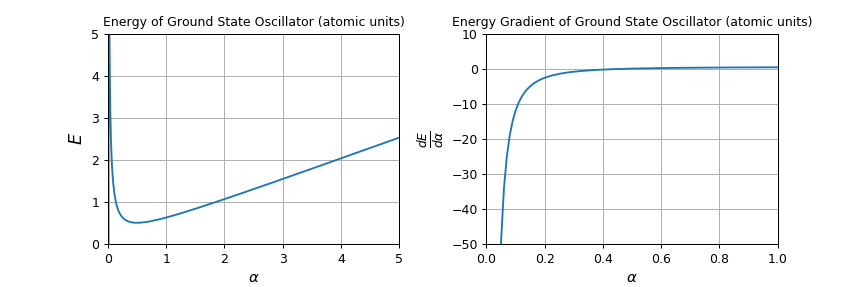

In [4]:
##Graphs##

#Alpha values
alpha = np.arange(-5,5,0.01)

#Figure 1...
fig1 = plt.figure(figsize = (9.6,3.2))

#Subplot 1
ax1 = fig1.add_subplot(122)
ax1.plot(alpha,egrad(alpha))
ax1.set_title(r'Energy Gradient of Ground State Oscillator (atomic units)',fontdict = {'size':10})
ax1.set_xlabel(r'$\alpha$',fontdict = {'size':12})
ax1.set_ylabel(r'$\frac{dE}{d\alpha}$',fontdict = {'size':14})
ax1.grid(True)
#Sets the x and y limits
ax1.set_ylim(-50,10)
ax1.set_xlim(0,1)

#Subplot 2
ax2 = fig1.add_subplot(121)
ax2.plot(alpha,e(alpha))
ax2.set_title(r'Energy of Ground State Oscillator (atomic units)',fontdict = {'size':10})
ax2.set_xlabel(r'$\alpha$',fontdict = {'size':12})
ax2.set_ylabel(r'$E$',fontdict = {'size':14})
ax2.grid(True)
#Sets the x and y limits
ax2.set_ylim(0,5)
ax2.set_xlim(0,5)

plt.subplots_adjust(bottom = 0.15,wspace = 0.3)

### Bisection

This cell calls the bisection routine on the root bracket defined in the variables section

In [5]:
##Bisection##

#Checks if bisection routine failed/succeeded 
root = bisection(a,b,t)
if root != None:
    print("Root is: ",root[0]," calculated after ",root[1],"iterations.")
else:
    print("Bisection Failed")

Root is:  0.5  calculated after  2 iterations.


From the above graphs, it is sensible to say that the root of the  is about 0.5 by sight. Substituting this value into equation $3.0$ gives 0 so it is an exact root. This value of $\alpha$ gives a minimum energy value of 0.5 (atomic units).

## Section 2 - Two Dimensional Quantum Harmonic Oscillator

For a two dimensional oscialltor the wave function is instead given by:

$$\psi(x,y) = \left[\frac{2\alpha}{\pi} \right ]^\frac{1}{4} \exp \left({-\alpha x^2}\right) \left[\frac{2\beta}{\pi} \right ]^\frac{1}{4} \exp \left({-\beta y^2}\right)\space\space\space\space\space\space(5.0)$$  

with energy:

$$E = \frac{\alpha}{2} + \frac{1}{8\alpha} + \frac{\beta}{2} + \frac{1}{8\beta}\space\space\space\space\space\space (6.0)$$




To find a minimum of a two dimensional function, the SciPy optimize function uses a method of conjugate gradients to search for a minimum in $\alpha$ and $\beta$ using the energy function and its vector gradient:

$$\left (\frac{\partial E}{\partial \alpha}, \frac{\partial E}{\partial \beta}\right)$$

Where:

$$ \frac{\partial E}{\partial \alpha} = \frac{1}{2} - \frac{1}{8\alpha^2} \space\space\space\space and\space\space\space\space\space  \frac{\partial E}{\partial \beta} = \frac{1}{2} - \frac{1}{8\beta^2}  \space\space\space\space\space\space (7.0)\space\space\space\space\space(8.0) $$


### Functions

This cell defines the functions for equations $(6.0)$-$(8.0)$ that need to be called for the SciPy optimize routine.

In [6]:
def e2D(x):
    """
    Calculates the energy of a two-dimensional quantum oscillator. 
    
    Input: array with values for alpha and beta.
    
    Output: energy value according to eqn 6.0
    
    """
    
    #Replace 0 values with 0.01 to avoid div by zero errors
    x = np.where(x==0,0.01,x)
    E_GS = 0.5*x[0] + 1/(8*x[0]) + 0.5*x[1] + 1/(8*x[1])
    
    
    return E_GS

def egrad2D(x):
    """
    Calculates the jacobian for the two dimensional energy function
    
    Input: numpy array containing alpha and beta values
    
    Output: gradient vector of the energy function
    
    """
    
    
    #Replace 0 values with 0.01 to avoid div by zero errors
    x = np.where(x==0,0.01,x)
    delalpha = 0.5 - 1/(8*x[0]*x[0])
    delbeta = 0.5 - 1/(8*x[1]*x[1])
    
    #Adds delalpha and delbeta values to an array
    v2d = np.array([delalpha,delbeta])
    return v2d

### Variables

In [7]:
#Arrays of alpha and beta values
alpha = np.arange(0.1,1,0.005)
beta =  np.arange(0.1,1,0.005)
#Combines the alpha and beta values as single array
single_argument = [alpha,beta]

### 3D surface
This cell creates a three dimensional colour map of the two dimensional energy function $(6.0)$

<IPython.core.display.Javascript object>


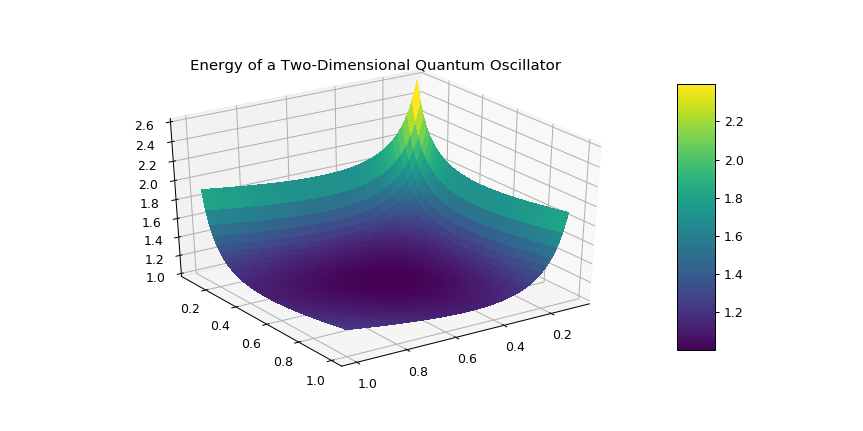

In [8]:
#Converts alpha and beta arrays into two dimensional arrays
alpha2D,beta2D = np.meshgrid(alpha,beta)
#Calculates the energy values for alpha2D and beta2D
E_GS2D = e2D(np.array([alpha2D,beta2D]))

#Figure 2...
fig2 = plt.figure(figsize = (9.6,4.8))
#New axes with 3d projection
ax3 = fig2.add_subplot(projection = '3d')
#Plots the surface
surface = ax3.plot_surface(alpha2D,beta2D,E_GS2D,cmap=cm.viridis,antialiased=False)
ax3.set_title("Energy of a Two-Dimensional Quantum Oscillator")
#Colour bar
fig2.colorbar(surface, shrink = 0.8, aspect = 7)

plt.show()

### Minimum of the Function

Uses optimize function from SciPy to calculate the minimum by method of conjugate gradients.

In [9]:
#Starting point
x0 = np.array([0.3,0.7])

#Calls the optimize routine from SciPy on the 2D energy function and its gradient along with a starting point
r = optimize.minimize(e2D, x0, method='CG', jac=egrad2D)
ra = np.array([r.success,r.x,r.nit])

#Checks if the routine was successful.
if ra[0] == True:
    print("Function minimum found at:({0:0.3f},{1:0.3f})".format(ra[1][0],ra[1][1]), "in", ra[2],"iterations")
else:
    print("Minimum search failed.")

Function minimum found at:(0.500,0.500) in 5 iterations


Looking at the surface plot above, a minimum at (0.5,0.5) is a reasonable initial assumption, and does infact correspond to an energy vector gradient of (0,0) with a minimum energy value of 1. 